In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
article_corpus = pd.read_json('datasets/dataset.jsonl', lines=True, orient='records')

In [40]:
article_corpus.head(3)

,doi,pmcid,title,plain_text,technical_text,journal,topics,keywords
0,10.3390/ani13050802,PMC10000022,Feral Kinetics and Cattle Research Within Plan...,This commentary advocates a note of caution wi...,The increased attention drawn to the negative ...,animals : an open access journal from mdpi,[Opinion],"[critical kinetics, planetary boundaries, tech..."
1,10.3390/ani13050915,PMC10000023,Rotational Grazing Modifies Rhipicephalus micr...,Ticks are one of the main problems in producti...,Rotational grazing has been mentioned as a pot...,animals : an open access journal from mdpi,[Article],"[cattle, ectoparasites, control, grasslands, t..."
2,10.3390/ani13050788,PMC10000024,Dietary Protein Requirement of Juvenile Dotted...,The dotted gizzard shad Konosirus punctatus is...,An 8-week feeding trial was conducted to inves...,animals : an open access journal from mdpi,[Article],"[Konosirus punctatus, growth, feed utilization..."


In [62]:
article_corpus.describe()

,doi,pmcid,title,plain_text,technical_text,journal,topics,keywords
count,49016,49016,49016,49016,49016,49016,49016,49016
unique,45066,45067,48971,48998,49008,188,390,41478
top,,,research proposals: production of technology a...,fracture of the proximal humerus (the top part...,i. to identify systematic reviews and meta-ana...,cancers,[article],[]
freq,3951,3950,8,2,2,8487,21521,5209


# Statistiche dataset

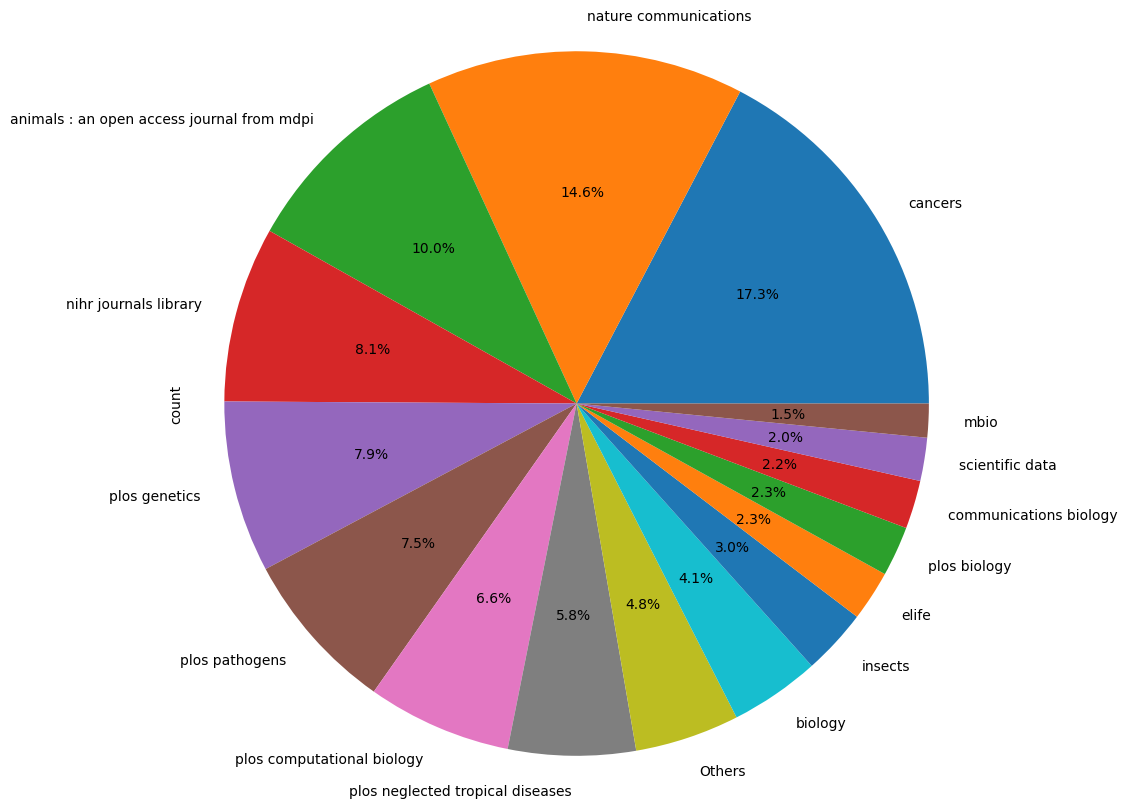

In [41]:
journal_counts = article_corpus["journal"].value_counts()

filtered_journal_counts = journal_counts[journal_counts / journal_counts.sum() > 0.01]

mask = article_corpus["journal"].isin(filtered_journal_counts.index)

article_corpus.loc[~mask, "journal"] = "Others"

filtered_article_counts = article_corpus["journal"].value_counts()

plt.figure(figsize=(10, 10))
filtered_article_counts.plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.show()


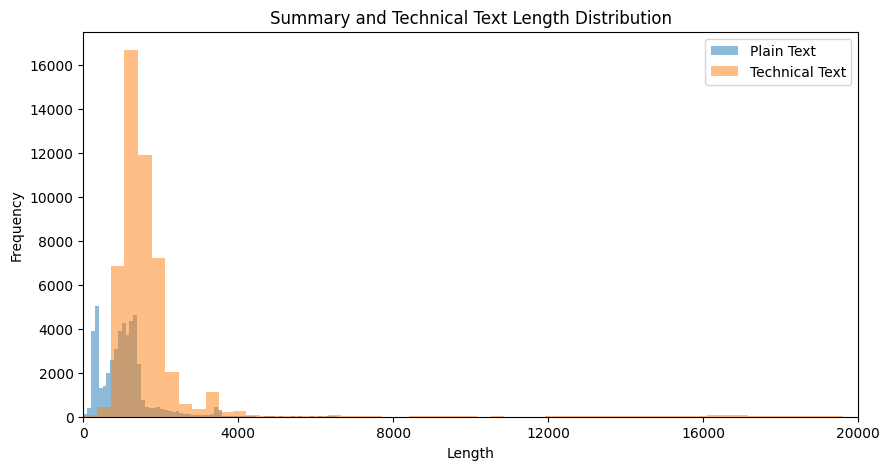

In [42]:
import matplotlib.pyplot as plt

plain_text_lengths = article_corpus["plain_text"].str.len()
technical_text_lengths = article_corpus["technical_text"].str.len()

plt.figure(figsize=(10, 5))

plt.hist(plain_text_lengths, bins=100, alpha=0.5, label="Plain Text")

plt.hist(technical_text_lengths, bins=100, alpha=0.5, label="Technical Text")

plt.title("Summary and Technical Text Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.legend()

plt.xlim(0, 20000) 
plt.xticks(range(0, 20001, 4000)) 

plt.show()


In [3]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pnmat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
article_corpus['plain_text_word_count'] = article_corpus['plain_text'].apply(lambda text: len(word_tokenize(text)))
article_corpus['technical_text_word_count'] = article_corpus['technical_text'].apply(lambda text: len(word_tokenize(text)))

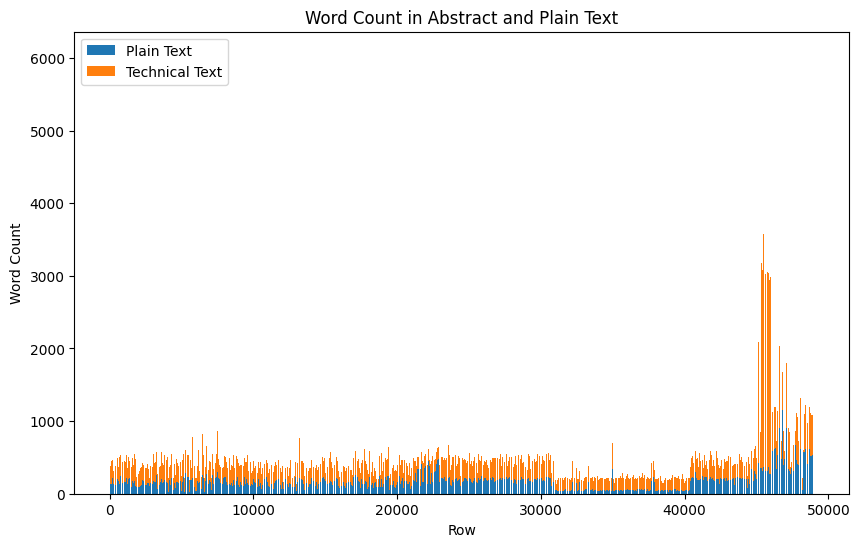

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(article_corpus.index, article_corpus['plain_text_word_count'], label='Plain Text')
plt.bar(article_corpus.index, article_corpus['technical_text_word_count'], bottom=article_corpus['plain_text_word_count'], label='Technical Text')
plt.xlabel('Row')
plt.ylabel('Word Count')
plt.title('Word Count in Abstract and Plain Text')
plt.legend()
plt.show()

In [5]:
from nltk.tokenize import sent_tokenize

In [6]:
article_corpus['plain_text_sent_count'] = article_corpus['plain_text'].apply(lambda text: len(sent_tokenize(text)))
article_corpus['technical_text_sent_count'] = article_corpus['technical_text'].apply(lambda text: len(sent_tokenize(text)))

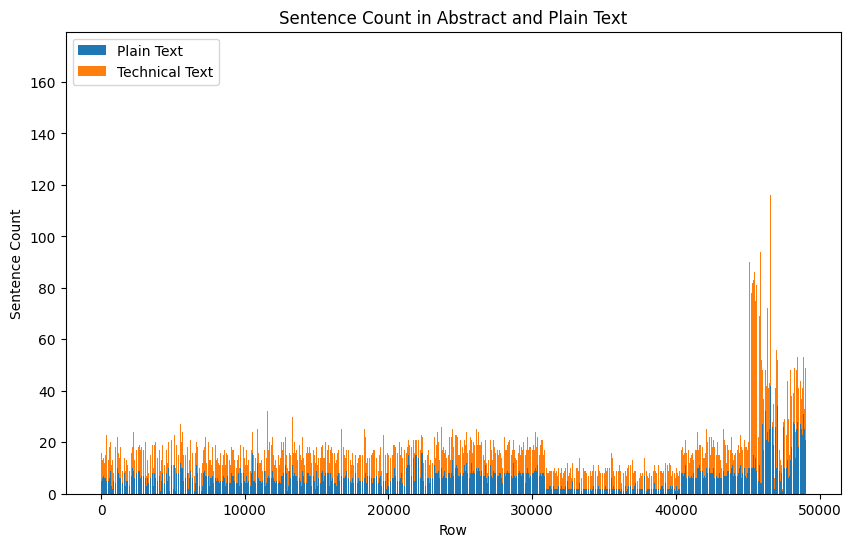

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(article_corpus.index, article_corpus['plain_text_sent_count'], label='Plain Text')
plt.bar(article_corpus.index, article_corpus['technical_text_sent_count'], bottom=article_corpus['plain_text_sent_count'], label='Technical Text')
plt.xlabel('Row')
plt.ylabel('Sentence Count')
plt.title('Sentence Count in Abstract and Plain Text')
plt.legend()
plt.show()

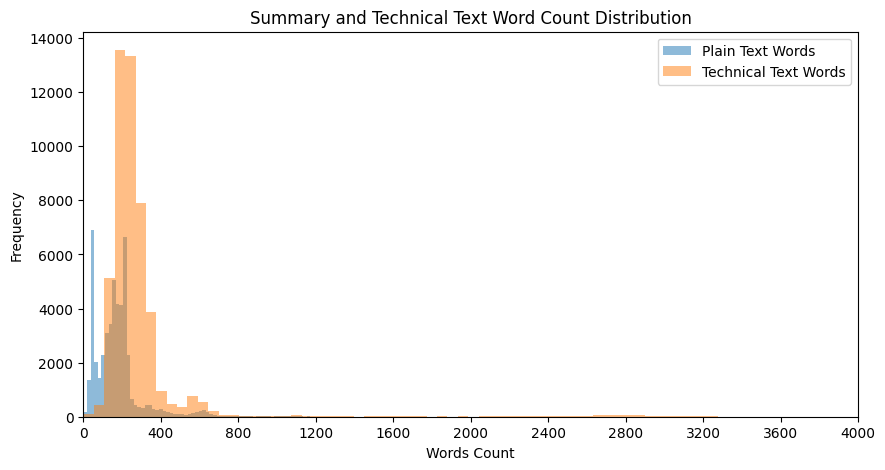

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.hist(article_corpus["plain_text_word_count"], bins=100, alpha=0.5, label="Plain Text Words")

plt.hist(article_corpus["technical_text_word_count"], bins=100, alpha=0.5, label="Technical Text Words")

plt.title("Summary and Technical Text Word Count Distribution")
plt.xlabel("Words Count")
plt.ylabel("Frequency")
plt.legend()

plt.xlim(0, 4000)
plt.xticks(range(0, 4001, 400))

plt.show()


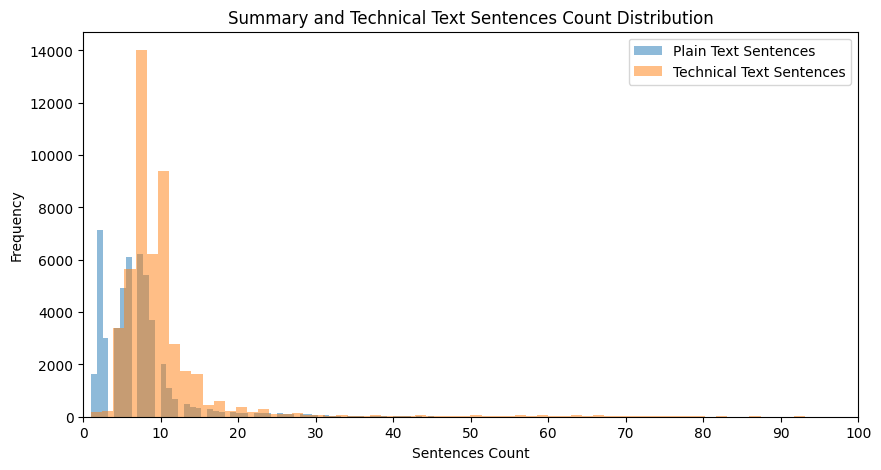

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.hist(article_corpus["plain_text_sent_count"], bins=100, alpha=0.5, label="Plain Text Sentences")

plt.hist(article_corpus["technical_text_sent_count"], bins=100, alpha=0.5, label="Technical Text Sentences")

plt.title("Summary and Technical Text Sentences Count Distribution")
plt.xlabel("Sentences Count")
plt.ylabel("Frequency")
plt.legend()  

plt.xlim(0, 100)
plt.xticks(range(0, 101, 10))

plt.show()


# Raffinamento dataset

## Rimozione Outliers dimensione

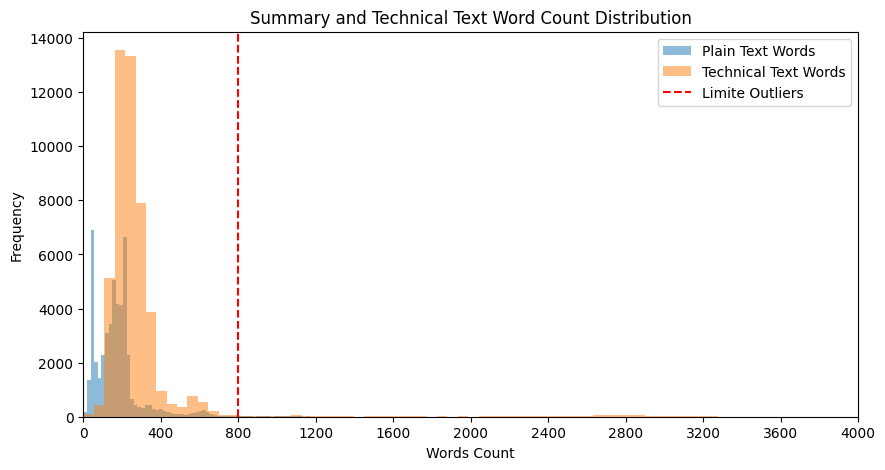

In [51]:
plt.figure(figsize=(10, 5))

plt.hist(article_corpus["plain_text_word_count"], bins=100, alpha=0.5, label="Plain Text Words")
plt.hist(article_corpus["technical_text_word_count"], bins=100, alpha=0.5, label="Technical Text Words")

plt.axvline(x=800, color='red', linestyle='--', label='Limite Outliers')  

plt.title("Summary and Technical Text Word Count Distribution")
plt.xlabel("Words Count")
plt.ylabel("Frequency")
plt.legend()

plt.xlim(0, 4000)
plt.xticks(range(0, 4001, 400))

plt.show()


In [7]:
article_corpus = article_corpus[(article_corpus["technical_text_word_count"] <= 800) & (article_corpus["plain_text_word_count"] <= 800)]

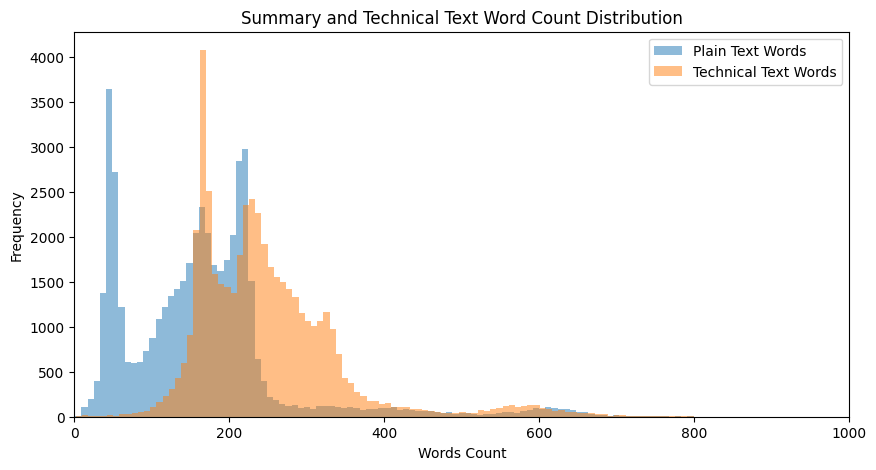

In [53]:
plt.figure(figsize=(10, 5))

plt.hist(article_corpus["plain_text_word_count"], bins=100, alpha=0.5, label="Plain Text Words")
plt.hist(article_corpus["technical_text_word_count"], bins=100, alpha=0.5, label="Technical Text Words")

plt.title("Summary and Technical Text Word Count Distribution")
plt.xlabel("Words Count")
plt.ylabel("Frequency")
plt.legend()

plt.xlim(0, 1000)
plt.xticks(range(0, 1001, 200))

plt.show()


## Rimozione Outliers compression

In [8]:
compression = article_corpus["technical_text_word_count"] / article_corpus["plain_text_word_count"]

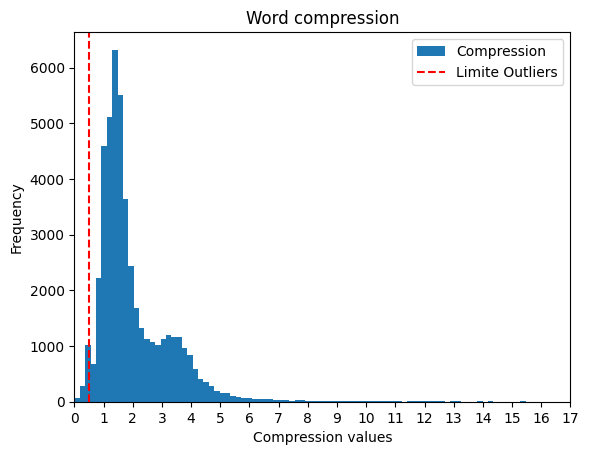

In [55]:
# Create a scatter plot
plt.hist(compression, bins=1000, label='Compression')

# Add labels and legend
plt.xlabel('Compression values')
plt.ylabel('Frequency')
plt.title('Word compression')

plt.axvline(x=0.5, color='red', linestyle='--', label='Limite Outliers')  
plt.legend()

plt.xlim(0, 17)
plt.xticks(range(0, 18, 1))

# Show the plot
plt.show()

In [9]:
article_corpus = article_corpus[compression >= 0.5]

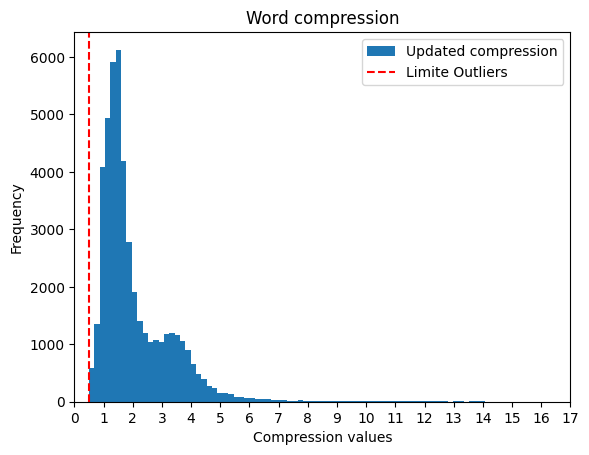

In [57]:
# Create a scatter plot
plt.hist(article_corpus["technical_text_word_count"] / article_corpus["plain_text_word_count"], bins=1000, label='Updated compression')

# Add labels and legend
plt.xlabel('Compression values')
plt.ylabel('Frequency')
plt.title('Word compression')

plt.axvline(x=0.5, color='red', linestyle='--', label='Limite Outliers')  
plt.legend()

plt.xlim(0, 17)
plt.xticks(range(0, 18, 1))

# Show the plot
plt.show()

# Dimensione dizionari

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit_transform(article_corpus["technical_text"])
technical_text_dictionary = vect.get_feature_names_out()

In [84]:
vect.fit_transform(article_corpus["plain_text"])
plain_text_dictionary = vect.get_feature_names_out()

# Altre metriche

In [73]:
# Metrica che si riferisce alla varietà di parole uniche all'interno di un testo o di un dataset. Una densità lessicale più alta indica una maggiore varietà lessicale.
def lexical_density(text):
    words = word_tokenize(text)
    unique_words = set(words)  
    lexical_density = len(unique_words) / len(words)
    return lexical_density

In [76]:
article_corpus["plain_text_lexical_density"] = article_corpus['plain_text'].apply(lambda text: lexical_density(text))
article_corpus["technical_text_lexical_density"] = article_corpus["technical_text"].apply(lambda text: lexical_density(text))

C:\Users\pnmat\AppData\Local\Temp\ipykernel_21716\3348270872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_corpus["plain_text_lexical_density"] = article_corpus['plain_text'].apply(lambda text: lexical_density(text))
C:\Users\pnmat\AppData\Local\Temp\ipykernel_21716\3348270872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_corpus["technical_text_lexical_density"] = article_corpus["technical_text"].apply(lambda text: lexical_density(text))


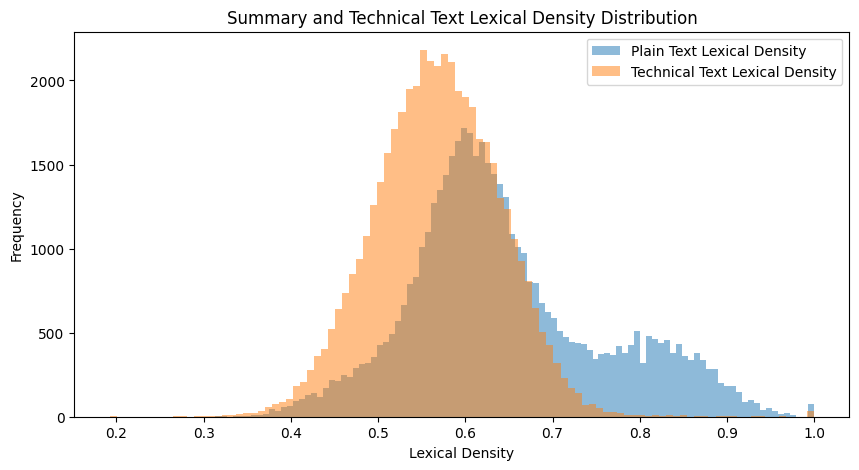

In [82]:
plt.figure(figsize=(10, 5))

plt.hist(article_corpus["plain_text_lexical_density"], bins=100, alpha=0.5, label="Plain Text Lexical Density")
plt.hist(article_corpus["technical_text_lexical_density"], bins=100, alpha=0.5, label="Technical Text Lexical Density")

plt.title("Summary and Technical Text Lexical Density Distribution")
plt.xlabel("Lexical Density")
plt.ylabel("Frequency")
plt.legend()

plt.show()


In [88]:
#Metrica che si riferisce alla percentuale di parole uniche nel testo o nel dataset rispetto al totale delle parole possibili. Una coverage più alta indica che hai coperto una porzione più ampia del vocabolario possibile.
def coverage(text, vocabulary):
    words = word_tokenize(text)  
    unique_words = set(words)  
    total_possible_words = len(vocabulary)  
    coverage_percentage = len(unique_words) / total_possible_words * 100
    return coverage_percentage

In [89]:
article_corpus["plain_text_coverage"] = article_corpus['plain_text'].apply(lambda text: coverage(text, plain_text_dictionary))
article_corpus["technical_text_coverage"] = article_corpus["technical_text"].apply(lambda text: coverage(text, technical_text_dictionary))

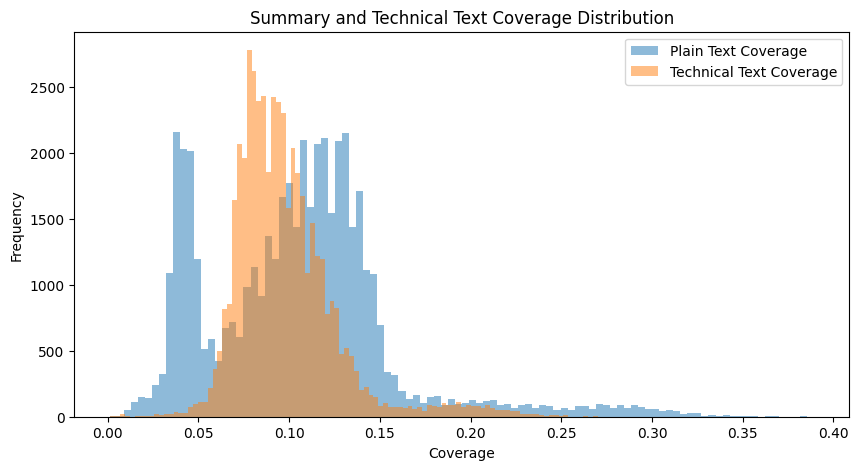

In [90]:
plt.figure(figsize=(10, 5))

plt.hist(article_corpus["plain_text_coverage"], bins=100, alpha=0.5, label="Plain Text Coverage")
plt.hist(article_corpus["technical_text_coverage"], bins=100, alpha=0.5, label="Technical Text Coverage")

plt.title("Summary and Technical Text Coverage Distribution")
plt.xlabel("Coverage")
plt.ylabel("Frequency")
plt.legend()

plt.show()


In [17]:
article_corpus.reset_index(drop=True, inplace=True)

In [18]:
from collections import namedtuple as _namedtuple
from tqdm import tqdm

Match = _namedtuple("Match", ("summary", "text", "length"))

def match_texts(a, b):
    matches = []
    a_start = 0
    b_start = 0
    while a_start < len(a):
        best_match = None
        best_match_length = 0
        while b_start < len(b):
            if a[a_start] == b[b_start]:
                a_end = a_start
                b_end = b_start
                while a_end < len(a) and b_end < len(b) and b[b_end] == a[a_end]:
                    b_end += 1
                    a_end += 1
                length = a_end - a_start
                if length > best_match_length:
                    best_match = Match(a_start, b_start, length)
                    best_match_length = length
                b_start = b_end
            else:
                b_start += 1
        b_start = 0
        if best_match:
            if best_match_length > 0:
                matches.append(best_match)
            a_start += best_match_length
        else:
            a_start += 1
    coverage = sum(o.length for o in matches) / len(a)
    density = sum(o.length ** 2 for o in matches) / len(a)
    return coverage, density, matches


def get_coverage_and_density_and_compression(sources, targets):
    tot_coverage = []
    tot_density = []
    tot_fragments = []
    tot_compression = []
    for i in tqdm(range(len(targets))):
        words_source = word_tokenize(sources[i])
        words_target = word_tokenize(targets[i])
        if len(words_source) > 0 and len(words_target) > 0:
            tot_compression.append(len(words_source) / len(words_target))
            words_source_norm = [str(t).lower() for t in words_source]
            words_target_norm = [str(t).lower() for t in words_target]
            coverage, density, frag = match_texts(words_target_norm, words_source_norm)
            tot_coverage.append(coverage)
            tot_density.append(density)
            tot_fragments.append(frag)
    avg_coverage = round(sum(tot_coverage) / len(tot_coverage), 2)
    avg_density = round(sum(tot_density) / len(tot_density), 2)
    avg_compression = round(sum(tot_compression) / len(tot_compression), 2)
    return avg_coverage, avg_density, avg_compression

In [20]:
coverage, density, compression = get_coverage_and_density_and_compression(article_corpus["technical_text"], article_corpus["plain_text"])

100%|██████████| 46486/46486 [03:48<00:00, 203.35it/s]


In [21]:
print(coverage, density, compression)

0.68 3.55 2.08


In [ ]:
from nltk.corpus import stopwords
from nltk.util import ngrams
from scipy.stats import entropy
from sklearn.feature_extraction.text import CountVectorizer


def get_redundancy_scores(predictions):
    sum_unigram_ratio = 0
    sum_bigram_ratio = 0
    sum_trigram_ratio = 0
    all_unigram_ratio = []
    all_bigram_ratio = []
    all_trigram_ratio = []
    sum_redundancy = 0
    stop_words = set(stopwords.words("english"))
    count = CountVectorizer()
    all_redundancy = []
    number_file = len(predictions)
    for p in predictions:
        all_txt = []
        all_txt.extend(word_tokenize(p.strip()))

        all_unigram = list(ngrams(all_txt, 1))
        uniq_unigram = set(all_unigram)
        if len(uniq_unigram) > 0:
            unigram_ratio = len(uniq_unigram) / len(all_unigram)
            sum_unigram_ratio += unigram_ratio
            all_unigram_ratio.append(unigram_ratio)

        all_bigram = list(ngrams(all_txt, 2))
        uniq_bigram = set(all_bigram)
        if len(uniq_bigram) > 0:
            bigram_ratio = len(uniq_bigram) / len(all_bigram)
            sum_bigram_ratio += bigram_ratio
            all_bigram_ratio.append(bigram_ratio)

        all_trigram = list(ngrams(all_txt, 3))
        uniq_trigram = set(all_trigram)
        if len(uniq_trigram) > 0:
            trigram_ratio = len(uniq_trigram) / len(all_trigram)
            sum_trigram_ratio += trigram_ratio
            all_trigram_ratio.append(trigram_ratio)

        # NID score
        num_word = len(all_txt)
        new_all_txt = [w for w in all_txt if not w in stop_words]
        new_all_txt = [" ".join(new_all_txt)]
        try:
            x = count.fit_transform(new_all_txt)
            bow = x.toarray()[0]
            max_possible_entropy = np.log(num_word)
            e = entropy(bow)
            redundancy = (1 - e / max_possible_entropy)
            sum_redundancy += redundancy
            all_redundancy.append(redundancy)
        except ValueError:
            continue
    uniq_unigram_ratio = round(sum_unigram_ratio / number_file, 4)
    uniq_bigram_ratio = round(sum_bigram_ratio / number_file, 4)
    uniq_trigram_ratio = round(sum_trigram_ratio / number_file, 4)
    NID = round(sum_redundancy / number_file, 4)
    unr_avg = (uniq_unigram_ratio + uniq_bigram_ratio + uniq_trigram_ratio) / 3
    return uniq_unigram_ratio, uniq_bigram_ratio, uniq_trigram_ratio, unr_avg, NID

In [175]:
get_redundancy_scores(article_corpus["plain_text"])

(0.6499, 0.9373, 0.9822, 0.8564666666666666, 0.174)

In [56]:
from collections import Counter

def common_word_percentage(sources, targets):
    target_words_count = []
    common_words_count = []
    for source, target in zip(sources, targets):
        source_words = set(word_tokenize(source))
        target_words = set(word_tokenize(target))
        target_words_count.append(len(target_words))
        common_words_count.append(len(source_words & target_words))
    return sum(common_words_count) / sum(target_words_count) * 100
        

In [57]:
common_word_percentage(article_corpus["technical_text"], article_corpus["plain_text"])

50.71853391774675

# Split istanze

In [ ]:
from sklearn.model_selection import train_test_split

X = article_corpus.drop(columns=["plain_text"])
y = article_corpus["plain_text"]

X, X_test, y, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

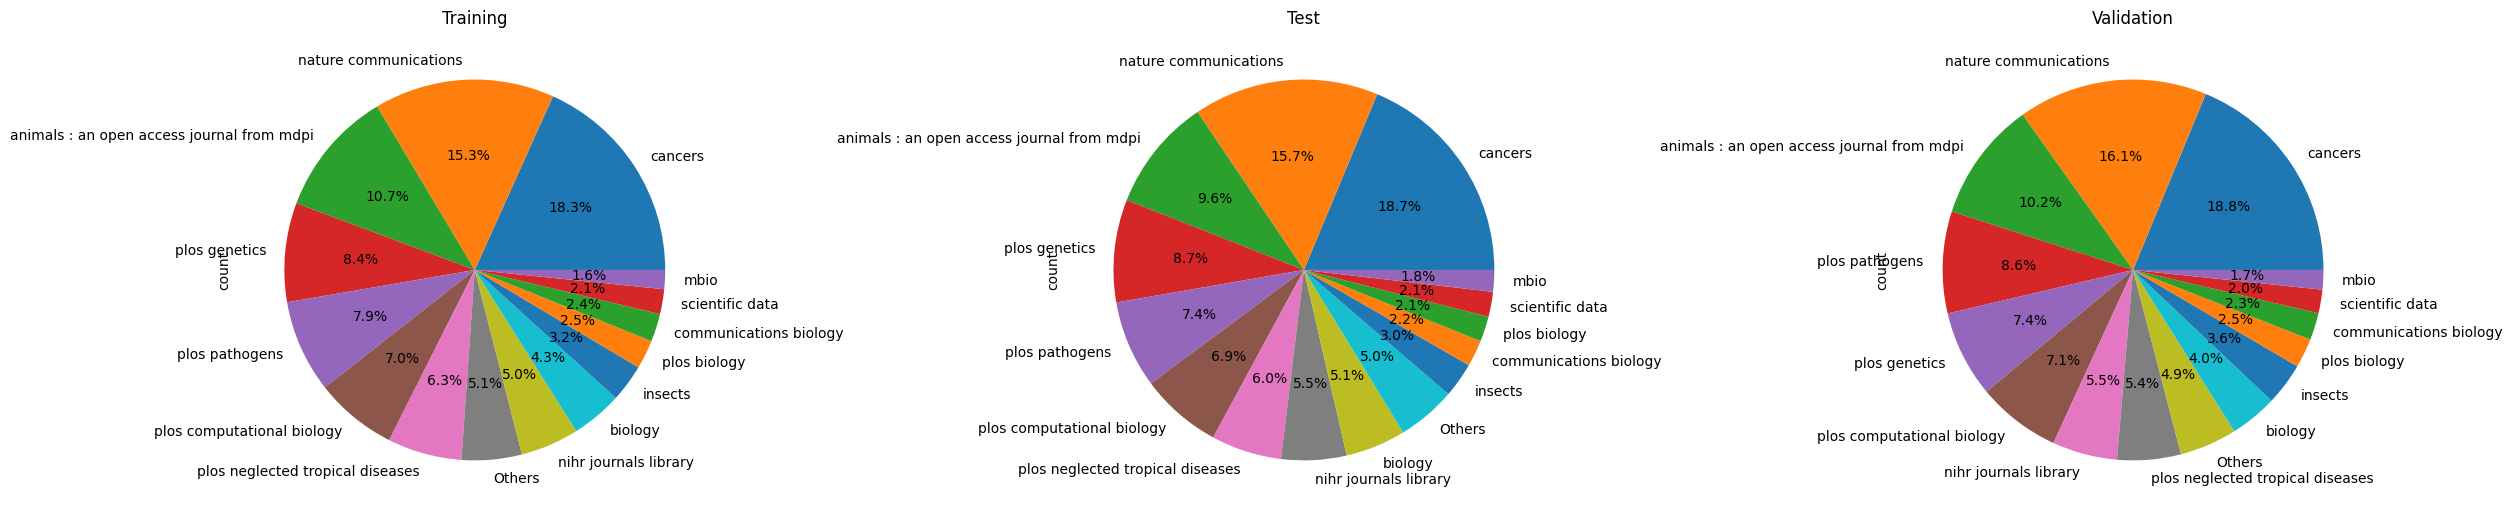

In [59]:
journal_counts_train = X_train["journal"].value_counts()
filtered_journal_counts_train = journal_counts_train[journal_counts_train / journal_counts_train.sum() > 0.01]
filtered_article_corpus_train = X_train[X_train["journal"].isin(filtered_journal_counts_train.index)]
mask = X_train["journal"].isin(filtered_journal_counts_train.index)
X_train.loc[~mask, "journal"] = "Others"

journal_counts_test = X_test["journal"].value_counts()
filtered_journal_counts_test = journal_counts_test[journal_counts_test / journal_counts_test.sum() > 0.01]
filtered_article_corpus_test = X_test[X_test["journal"].isin(filtered_journal_counts_test.index)]
mask = X_test["journal"].isin(filtered_journal_counts_test.index)
X_test.loc[~mask, "journal"] = "Others"

journal_counts_val = X_val["journal"].value_counts()
filtered_journal_counts_val = journal_counts_val[journal_counts_val / journal_counts_val.sum() > 0.01]
filtered_article_corpus_val = X_val[X_val["journal"].isin(filtered_journal_counts_test.index)]  
mask = X_val["journal"].isin(journal_counts_val.index)
X_val.loc[~mask, "journal"] = "Others"



fig, axes = plt.subplots(1, 3, figsize=(25, 10))

filtered_article_corpus_train["journal"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
filtered_article_corpus_test["journal"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
filtered_article_corpus_val["journal"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2])

axes[0].set_title("Training")
axes[1].set_title("Test")
axes[2].set_title("Validation")

plt.tight_layout()


In [70]:
article_corpus = article_corpus[['doi', 'pmcid', 'plain_text', 'technical_text', 'journal', 'topics', 'keywords']]
article_corpus.to_json("datasets/filtered_dataset.jsonl", orient="records", lines=True)